# Support Vector Machine

The Support Vector Machine is a very powerful and flexible class of supervised machine learning algorithms for classification and regression tasks.

## Support Vector Machine
In machine learning, support vector machines are a set of supervised machine learning algorithms that can be used for both classification and regression. They belong to the category of generalized linear classifiers. Simply put, the Support Vector Machine is a classification and regression algorithm that gives greater accuracy by automatically avoiding overfitting of the data.

The great strength of SVM is that the training is very simple. It does not require any optimal, unlike neural networks. It also fits the data very well to very high dimensional data. So, here we implement a Support Vector Machine on a very popular ‘Iris’ dataset.

Support Vector Machine Tutorial using Python
Support Vector Machine is one of the best approaches for data modelling. It uses generalization checking as a technique to check dimensionality.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading and reading DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Validations and checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
df.isna().sum()/100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
Target               0.0
dtype: float64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Now let’s visualize some of the important features in the data to understand what we are working with:

<Figure size 800x500 with 0 Axes>

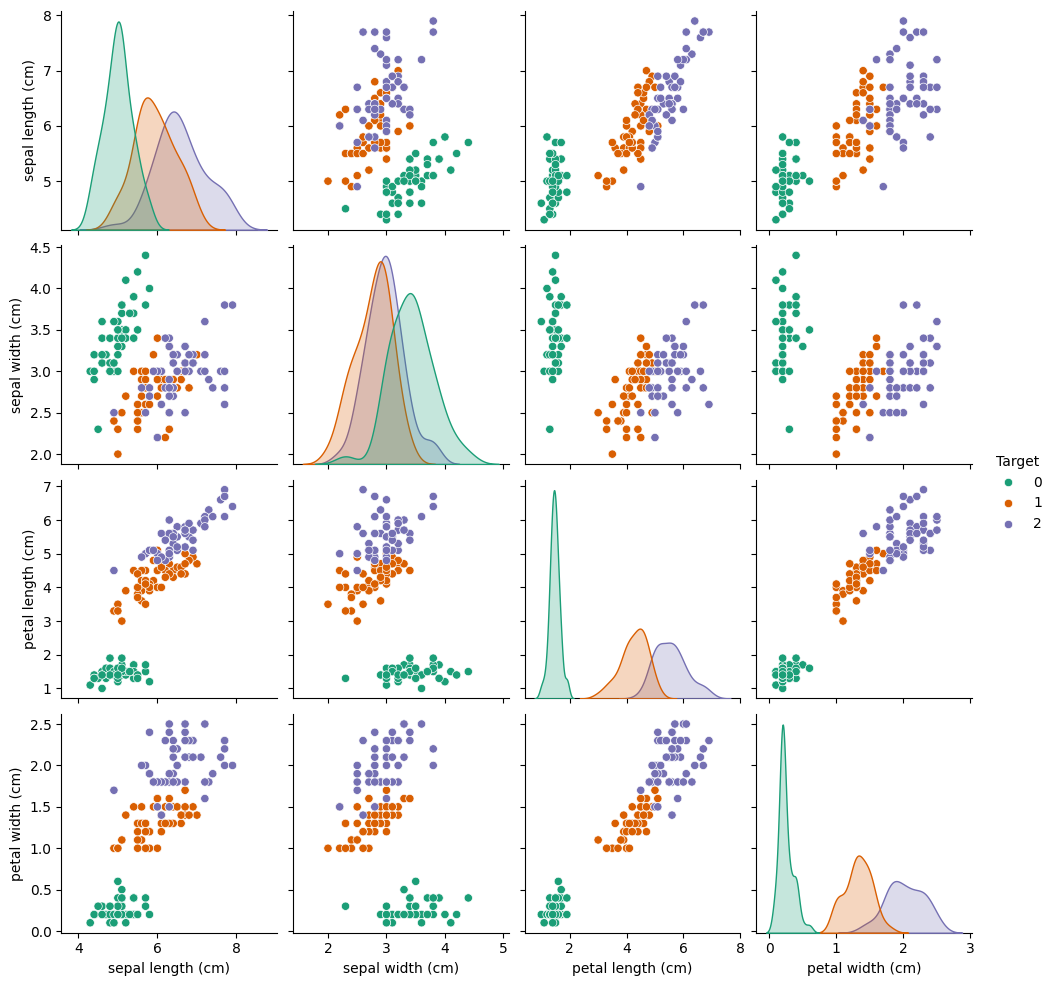

In [6]:
plt.figure(figsize=(8,5))
sns.pairplot(df, hue='Target',palette='Dark2')
plt.show()

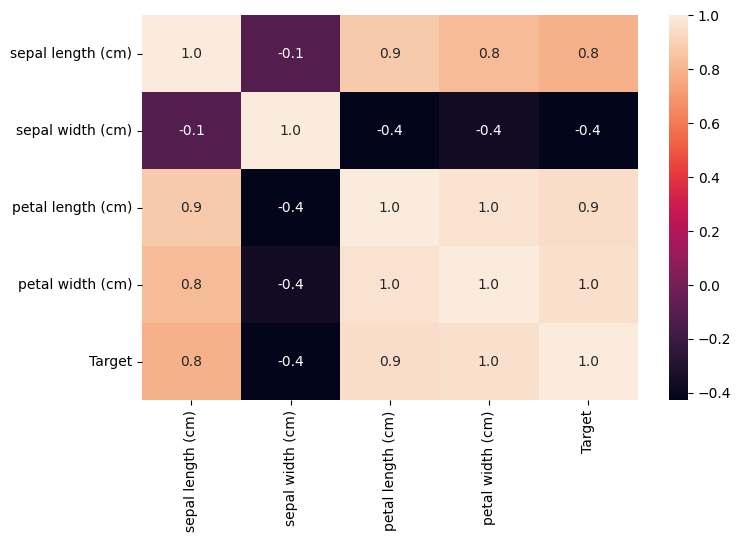

In [7]:
correlation = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, fmt='.1f')
plt.show()

In [8]:
df['Target'].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

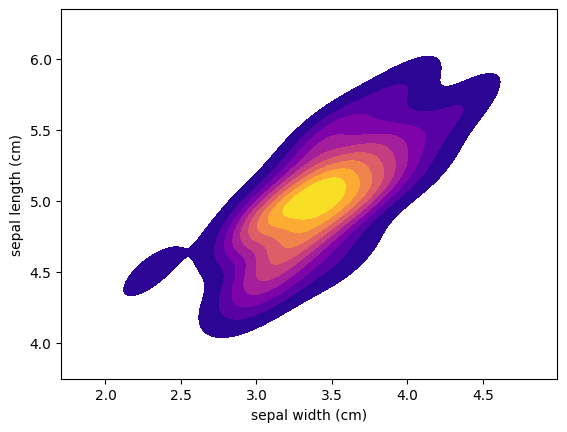

In [9]:
setosa = df[df['Target']==0]
# Create a scatter plot
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', data=setosa)
# Overlay a kernel density estimate plot
sns.kdeplot(x='sepal width (cm)', y='sepal length (cm)', data=setosa, cmap="plasma", fill=True)
plt.show()

To train the SVM classifier I will split the data into training and test sets:

In [10]:
X = df.drop('Target',axis=1)
y = df['Target']

x_min, x_max = X['sepal length (cm)'].min()-1, X['sepal length (cm)'].max()+1
y_min, y_max = X['sepal width (cm)'].min()-1, X['sepal width (cm)'].max()+1
h = (x_max/x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
c = 1.0
SV_classifier = SVC(kernel='linear', C=c, decision_function_shape='ovr').fit(X[['sepal length (cm)','sepal width (cm)']],y)
Z = SV_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


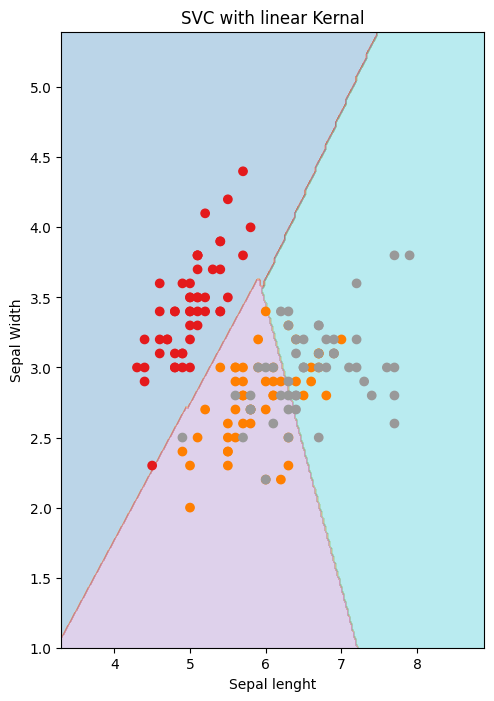

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear Kernal')
plt.show()

Now let’s train the model, I will import the SVC model from scikit-learn and simply fit the data in the model:

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=df['Target'], test_size=0.20, random_state=43)

In [13]:
SV_classifier = SVC(kernel='linear', C=c, decision_function_shape='ovr').fit(X_train, y_train)
_pred = SV_classifier.predict(X_valid)
print('Accuracy score:\n', accuracy_score(y_valid, _pred))
print()
print('Classification report:\n', classification_report(y_valid, _pred))

Accuracy score:
 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



So the model performed pretty well. Let’s see if we can tune the hypermeters to try to get even better, unlikely, and you would probably be happy with these results, as the dataset is quite small, but I just want you to practice using GridSearch:

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_valid)

print(confusion_matrix(y_valid, grid_predictions))
print(classification_report(y_valid, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

I hope this algorithm might help you to understand what SVM is.